# Let's test your implementation of KNN 

In [1]:
from knn_scratch import KNN
KNN

knn_scratch.KNN

In [2]:
assert KNN is not None, 'KNN should be imported'
assert 'fit' in dir(KNN) and 'predict' in dir(KNN), 'Your implementation should follow the sklearn standards (fit and predict methods)'

## Load your data into X and y

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns= iris.feature_names)
def get_names_target(value, iris):
    for i in range(len(iris['target_names'])):
        if value == i: return iris['target_names'][i]
df = pd.DataFrame(iris.data, columns = iris['feature_names'])
df['class'] = iris['target']
df['target'] = df['class'].apply(get_names_target, iris = iris)
X = np.array(df[['sepal length (cm)','sepal width (cm)']])
y = np.array(df['class'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,target
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
assert X is not None and type(X) == np.ndarray, 'X should be defined and be a numpy array'
assert y is not None and type(y) == np.ndarray, 'y should be defined and be a numpy array'

## Plot X showing the class

example
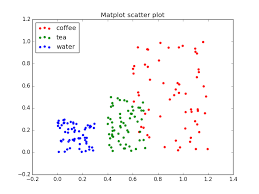

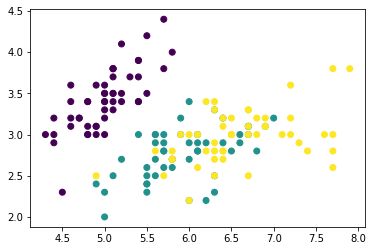

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=df['class'])

## Fit the model

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3, random_state = 50)
model = KNN(k=5).fit(X_train, y_train)

In [7]:
assert model is not None and type(model) == KNN, 'Fit method should return itself'

## Predict the classes for the same data

In [8]:
y_pred = model.predict(X_test)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train) 

In [10]:
print('Accuracy scartch KNN {:0.2f}%'.format(100*model.score(y_test, y_pred)))
print('Accuracy sklearn KNN {:0.2f}%'.format(100*model_knn.score(X_test, y_test)))

Accuracy scartch KNN 78.00%
Accuracy sklearn KNN 78.00%


## Show the decission boundaries depending on K for your model
example
<img src="https://i.stack.imgur.com/ZDVhm.png" width="300"/>
(tricky one so we are going to help you out with this one)

In [11]:
from ipywidgets import interact

@interact
def plot_decision_boundary(k=(1,10,1)):
    model = KNN(k=k).fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5))
    Z = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()]))
    
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z)

    for c in set(y):
        plt.scatter(*X[y==c].T)

interactive(children=(IntSlider(value=5, description='k', max=10, min=1), Output()), _dom_classes=('widget-int…

## SKLearn Modelling

In [12]:
from ipywidgets import interact

@interact
def plot_decision_boundary(k=(1,10,1)):
    model = KNeighborsClassifier(n_neighbors=k).fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5))
    Z = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()]))
    
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z)

    for c in set(y):
        plt.scatter(*X[y==c].T)

interactive(children=(IntSlider(value=5, description='k', max=10, min=1), Output()), _dom_classes=('widget-int…

# N-Dimensional Xs

In [13]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3, random_state = 100)
model = KNN(k=3).fit(X_train, y_train)
y_pred = model.predict(X_test)
model_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train) 



In [14]:
print('Accuracy scartch KNN {:0.2f}%'.format(100*model.score(y_test, y_pred)))
print('Accuracy sklearn KNN {:0.2f}%'.format(100*model_knn.score(X_test, y_test)))

Accuracy scartch KNN 98.00%
Accuracy sklearn KNN 98.00%


## KNN FROM SCRATCH K VARIATIONS

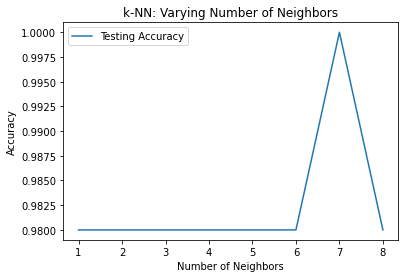

In [15]:
neighbors = np.arange(1, 9)
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNN(k=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score( y_test, knn.predict(X_test))

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## SKLEARN MODEL

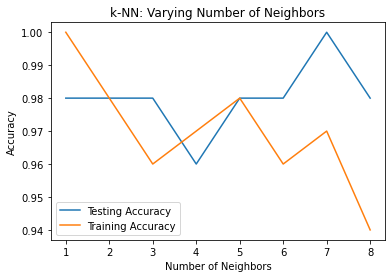

In [16]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# BREST CANCER DATASET WITH PCA

In [17]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
df_cancer = pd.DataFrame(data.data, columns = data['feature_names'])
df_cancer['class'] = data['target']
y = df_cancer['class']
X = np.array(df_cancer.iloc[:,:31])
X_df = pd.DataFrame(data=X)
print(y.shape)
X_df.shape

(569,)


(569, 31)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_df)
df_pca = pd.DataFrame(data=X_pca)
print("Variance in each component",pca.explained_variance_)
print("Variance ratio in each component",pca.explained_variance_ratio_)
df_pca



Variance in each component [443782.73097976   7310.10041612]
Variance ratio in each component [0.98204444 0.01617648]


,0,1
0,1160.142744,-293.917535
1,1269.122597,15.630194
2,995.794082,39.156723
3,-407.180411,-67.380505
4,930.341382,189.340710
...,...,...
564,1414.126817,110.222522
565,1045.019040,77.057573
566,314.502046,47.553423
567,1124.858290,34.129218


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size= 1/3, random_state = 50)
model = KNN(k=5).fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy scratch KNN {:0.2f}%'.format(100*model.score(y_test, y_pred)))

Accuracy scratch KNN 92.63%


## KNN FROM SCRATCH K VARIATIONS

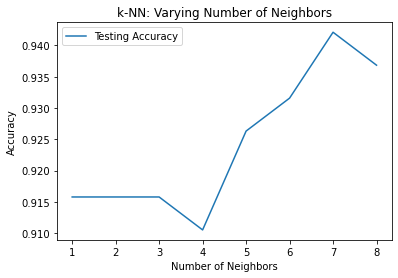

In [21]:
neighbors = np.arange(1, 9)
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    
    knn = KNN(k).fit(X_train, y_train)
    # Fit the classifier to the training data
    y_pred = knn.predict(X_test)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score( y_test, y_pred)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## SKLEARN K VARIATION MODEL

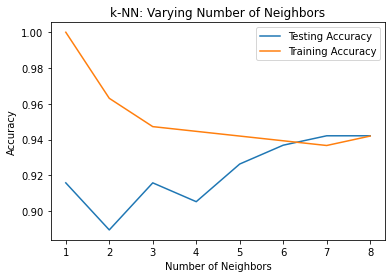

In [22]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Without PCA

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size= 1/6, random_state = 50)
model = KNN(k=3).fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy scartch KNN {:0.2f}%'.format(100*model.score(y_test, y_pred)))

Accuracy scartch KNN 90.53%


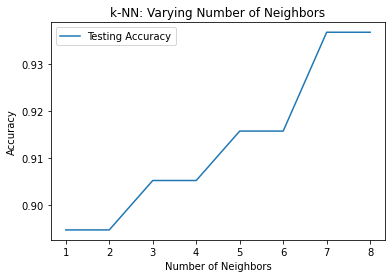

In [24]:
neighbors = np.arange(1, 9)
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    
    knn = KNN(k).fit(X_train, y_train)
    # Fit the classifier to the training data
    y_pred = knn.predict(X_test)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score( y_test, y_pred)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


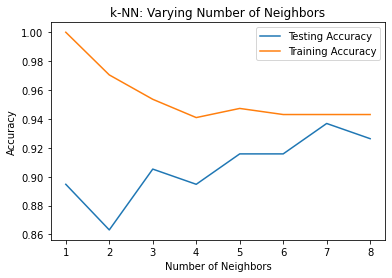

In [25]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()